공공데이터포털 OpenAPI 이용
---

마지막으로 지금까지 배운 내용들을 종합해 [공공데이터포털](https://www.data.go.kr/index.do)에서 오픈 API를 이용하여 데이터를 저장한 뒤 분석하는 예제를 다루겠습니다.

# API는 뭐에요

API(Application Programming Interface, 응용 프로그램 프로그래밍 인터페이스)는 두 프로그램을 서로 이어주는 방식(메커니즘)을 말합니다. A라는 프로그램에서 B라는 프로그램이 제공하는 기능을 사용하고 싶을 때, A는 B에게 어떠한 서비스를 요청(request)할 것이고 B는 요청받은 서비스를 A에게 제공(응답, response)하는 식으로 API를 통해 서로 통신하게 됩니다. API는 추상적인 개념일 뿐이고 우리가 흔히 말하는 API는 사실 API라는 개념을 구현한 API 구현체(implemetation) 또는 API 사양(specification)들입니다.

예시를 들어 설명하겠습니다. 

1. 우리는 이미 API를 수도 없이 사용해 왔습니다. Numpy, Pandas, Matplotlib같은 패키지들의 함수나 변수를 사용하다 보면 VSCode가 알아서 함수에 대한 설명을 플로팅 윈도우에 보여줍니다. 여기에 적혀있는 함수에 대한 설명을 통해 우리가 만든 프로그램에서 위와 같은 패키지들이 제공하는 기능을 사용할 수 있었습니다. 즉 이러한 패키지 설명 문서들이 API 구현체이고 우리는 문서라는 API를 통해 우리의 프로그램과 이미 만들어진 패키지 사이의 연결지을수 있던 것입니다.
   
   [Numpy API Reference](https://numpy.org/doc/stable/reference/) </br>
   [Matplotlib API Reference](https://matplotlib.org/stable/api/index) </br>
   [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html)

2. 핸드폰의 킥보드 대여 앱이나 카카오택시같은 운송 서비스를 사용해보신 적 있나요? 모두 메인 GUI가 지도인 어플리케이션들입니다. 그렇다면 킥보드 대여업체는 현재 위치를 추적하고 주변의 킥보드를 지도상에서 보여주는 프로그램을 처음부터 다 만들어야 할까요? 그럴 필요 없이 지도 서비스 제공자를 찾아가면 됩니다. 대부분의 지도에서 다른 어플리케이션에서 지도를 이용할 수 있도록 API를 제공하고 있습니다.
   
   [카카오맵 API](https://apis.map.kakao.com/) </br>
   [네이버 지도 API](https://navermaps.github.io/maps.js/) </br>
   [Google Maps Platform](https://developers.google.com/maps?hl=ko)

3. SNS나 포털 사이트 계정으로 홈페이지에 로그인하기, 핸드폰 인증번호나 PASS 앱을 통해 본인인증하기, 회원가입 시 주소 검색창에서 집주소 검색하기 모두 API가 없으면 매우 불편했을 서비스들입니다.
   
   [페이스북 로그인 API](https://developers.facebook.com/docs/facebook-login/web?locale=ko_KR) </br>
   [NICE API](https://www.niceapi.co.kr/#/) </br>
   [실시간 주소정보 조회 API](https://www.juso.go.kr/addrlink/openApi/apiExprn.do?cPath=99MA)


API 사양에는 다양한 것들이 있지만, 1번 예시처럼 문서 형식으로 제작된 API Reference(Document)가 있고 2, 3번 예시처럼 웹 서비스(HTTP)를 사용하여 클라이언트(고객)와 서버(제공자)가 통신하는 웹 API가 있습니다. 최근에는 API라고 하면 죄다 웹 REST API를 말하는 것 같습니다. 그래서 우리도 할거임

# 준비하기

코드 작성에 앞서 필요한 패키지들을 모두 import합니다. 패키지를 import하는 부분은 ipynb 환경에서 제일 처음 셀에 위치시키는 것이 좋습니다.

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import calendar
from xml.etree import ElementTree as ET

또한 다음과 같이 터미널 명령어를 입력하여 필요한 패키지를 설치하거나 업그레이드 할 수 있습니다. 로컬 환경이 아닌 원격 환경에서, 특히 접속 시마다 커널이 초기화되는 Google Colab같은 환경에서 자주 사용합니다. ```%```나 ```!```를 입력하고 코드 셀에 터미널 명령어를 입력할 수 있습니다.

In [2]:
%pip install matplotlib --upgrade --user

Note: you may need to restart the kernel to use updated packages.


## Matplotlib 전역 설정
Matplotlib의 단점은 plot 내에 한글 입력이 안 된다는 겁니다... 그래서 한글 입력을 가능하게 하려면 다음과 같은 과정이 필요합니다

In [3]:
# 사용 가능한 한글 폰트 찾기
keyword = 'Apple' # 네이버 무료글꼴 나눔체
# 나눔체가 없을 경우, 윈도우의 경우 'Malgun'
# mac의 경우 'Apple' 입력
font_list = [f.name for f in mpl.font_manager.fontManager.ttflist if keyword in f.name]
print(font_list[:10])

['AppleGothic', 'Apple SD Gothic Neo', 'Apple Braille', 'Apple Symbols', 'Apple Braille', 'Apple Chancery', 'AppleMyungjo', 'Apple Braille', 'Apple Braille', 'Apple Braille']


사용할 수 있는 폰트들이 출력되는 것을 볼 수 있습니다. 여기에 추가적으로 몇 가지 설정들을 더 해주면 준비 완료입니다.

In [4]:
mpl.rcParams['axes.unicode_minus'] = False # 이거 안쓰면 마이너스 부호 깨짐
# 이 아래 5줄은 vscode나 본인 에디터에서 plot 글자가 안보일때(검은 배경에 검은 글씨가 나온다던지) 사용하세요
# COLOR = 'k' # 본인 IDE 색에 따라서 'w'(흰색) 또는 'k'(검정색)으로 바꿀 것
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR # 모든 글자 색깔 통일
mpl.rcParams['figure.figsize'] = (15, 12) # global figure size 지정. 나중에 override 가능
mpl.rcParams['font.size'] = 20 # global font size 지정. 나중에 override 가능

mpl.rcParams['font.family'] = 'Apple SD Gothic Neo' # 이래야 한글 안깨짐 # Windows; NanumGothic, mac: NanumGothicOTF 또는 Apple SD Gothic Neo

# API 서비스 키를 통해 데이터 요청

저희가 사용할 자료는 [국토교통부의 아파트 매매 실거래자료](https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15058747)입니다. API 사용을 위해서는 포탈 회원가입 후 API 서비스 키를 발급받아야 합니다. 운영계정이 아닌 개발계정은 일일 트래픽(API 호출 횟수)이 1000회로 제한되어 있으니 조심하는게 좋습니다.

## 쿼리 스트링

우리가 사용할 REST API는 특정 URL(엔드포인트라 부름) 뒤에 쿼리 스트링이라는 것을 붙여 호출하게 됩니다. 쿼리 스트링은 ```?``` + ```key=value``` + ```&``` 같은 식으로 이루어집니다.

In [5]:
service_url = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev'
service_key = 'JFyS%2Bo8fMcstOW85Nw6SoF52PZ8%2Fzr%2Bo8u502S0v0%2BW5henM2jTXYl7Vkc7OqLdFXE3go3opKt2pPeukrXb7%2Bw%3D%3D'
service_key_2 = '7ZmNgzkXtrDdGl7X4F6qU9rb69SeSmpMNskzVpSlmHo09fVcNzP0h90Tm%2BL5Xd3OH8JnpqCIc4sTXASjdo3u%2BQ%3D%3D'

page_no = 1
num_of_rows = 100
# 11110 ~ 11740: 서울시 전체, 30씩 늘어남
lawd_cd = '11620'
year = 2021
months = range(1,13)
query_string_list = ['?' + \
    f'&pageNo={page_no}&numOfRows={num_of_rows}&LAWD_CD={lawd_cd}&DEAL_YMD={year}{month:02}&serviceKey={service_key}'
    for month in months]

호출은 ```requests``` 패키지의 ```get(url)``` 메서드를 통해 이루어집니다. 응답은 xml형식의 파일인데, 이를 xml parsing하여 데이터프레임으로 변환하는 과정이 필요합니다.

> Q: 왜 pd.read_xml() 함수를 쓰지 않나요? A: 써봤는데 오류가 계속 나서 포기했습니다...

> 더 간단하게 API 호출하는 방식이 있습니다. 바로 아래 링크(엔드포인트url + 쿼리스트링)를 브라우저에 입력하면 바로 xml파일이 보입니다. 쿼리스트링의 구조에 주목하시길 바랍니다.
  http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?&pageNo=1&numOfRows=100&LAWD_CD=11620&DEAL_YMD=202112&serviceKey=JFyS%2Bo8fMcstOW85Nw6SoF52PZ8%2Fzr%2Bo8u502S0v0%2BW5henM2jTXYl7Vkc7OqLdFXE3go3opKt2pPeukrXb7%2Bw%3D%3D

> 이런 쿼리스트링 방식은 사실 많은 url에서 볼 수 있습니다. 다음 링크처럼요. </br>
  https://www.op.gg/champions/kennen/top/build?region=kr&tier=platinum_plus

In [6]:
df_list = []

# response된 xml 파일을 DataFrame으로 변환하는 작업
for params in query_string_list:
    req_url = service_url + params
    response = requests.get(req_url).text
    tree = ET.fromstring(response)
    items = tree.findall('.//item')
    item_list = [[i.text for i in item] for item in items]
    columns_list = [[i.tag for i in item] for item in items]
    idx = np.argmax([len(col) for col in columns_list])
    columns = columns_list[idx].copy()
    columns = [i.tag for i in items[0]]
    df_temp = pd.DataFrame(item_list, columns=columns).copy()
    df_list.append(df_temp)
    
df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()

(1099, 28)


,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"99,000",,1988,2021,남부순환로248길,00056,00000,11620,01,0,...,1,1,11620-29,136.11,,179-58,11620,6,,
1,"33,500",,1999,2021,봉천로,00576,00000,11620,01,0,...,1,2,11620-10,32.76,,1629-2,11620,3,,
2,"87,900",,2000,2021,관악로30길,00012,00000,11620,01,0,...,1,2,11620-21,84.96,,1706,11620,26,,
3,"89,900",,2000,2021,관악로30길,00012,00000,11620,01,0,...,1,3,11620-21,84.96,,1706,11620,20,,
4,"81,000",,2003,2021,성현로,00080,00000,11620,01,0,...,1,4,11620-4,59.83,,1712,11620,13,,


변환된 데이터프레임은 위와 같습니다. 총 1099개, 28개의 성분을 가진 데이터입니다.

# 결측값(NaN) 채우기

Pandas로 데이터를 불러들이면 비어 있는 값이 NaN(Not a Number)이라고 표시될 때가 많습니다. 이런 결측값은 데이터 계산 시 치명적일 수 있으므로 다음과 같은 과정을 걸쳐 지워주도록 합시다.

In [7]:
# df.isnull().sum()
df.isna().sum()
idx = df['해제여부'].isna().values
# 확인하려면 df['해제여부'][idx]
df['해제여부'].fillna(' ', inplace=True) # 

전체 28개의 속성 중 이번 예제에서 사용할 중요한 속성들만 뽑아서 새로운 데이터프레임을 만들겠습니다.

In [8]:
# Reduce DataFrame using deep copy

df_reduced = df[['거래금액', '건축년도', '법정동', '아파트', '월', '일', '전용면적', '층']].copy()
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   거래금액    1099 non-null   object
 1   건축년도    1099 non-null   object
 2   법정동     1099 non-null   object
 3   아파트     1099 non-null   object
 4   월       1099 non-null   object
 5   일       1099 non-null   object
 6   전용면적    1099 non-null   object
 7   층       1099 non-null   object
dtypes: object(8)
memory usage: 68.8+ KB


# 데이터 씹고 뜯고 맛보고 즐기고

이제 데이터가 잘 정리되었는지 확인해봅시다.

In [9]:
df_reduced.head()

,거래금액,건축년도,법정동,아파트,월,일,전용면적,층
0,"99,000",1988,봉천동,낙성대현대아파트,1,1,136.11,6
1,"33,500",1999,봉천동,동아타운,1,2,32.76,3
2,"87,900",2000,봉천동,봉천우성,1,2,84.96,26
3,"89,900",2000,봉천동,봉천우성,1,3,84.96,20
4,"81,000",2003,봉천동,관악드림(동아),1,4,59.83,13


현재 모든 열의 자료형이 object이므로, 원활한 계산을 위해 각 행에 맞는 자료형으로 변환해 주겠습니다. 

* 거래금액, 건축년도, 월, 일, 층: int
* 전용면적: float
* 법정동, 아파트: string

자료형 변환을 Pandas가 알아서 해 주는 함수도 존재합니다.

In [10]:
# object type을 알아서 다른 자료형으로 변환
df_reduced = df_reduced.convert_dtypes()
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   거래금액    1099 non-null   string
 1   건축년도    1099 non-null   string
 2   법정동     1099 non-null   string
 3   아파트     1099 non-null   string
 4   월       1099 non-null   string
 5   일       1099 non-null   string
 6   전용면적    1099 non-null   string
 7   층       1099 non-null   string
dtypes: string(8)
memory usage: 68.8 KB


그런데 왜 전부 string으로 변환되었을까요? ```convert_dtypes()```함수 탓을 하기 전에 현재 자료의 상태를 다시 점검해 보겠습니다. 각 열에 어떤 속성들이 존재하는지 ```unique()```함수로 살펴봅시다.

In [11]:
print(df_reduced['월'].unique())
print(df_reduced['일'].unique())

<StringArray>
[ '1',  '4',  '6', '18', '21', '22', '28',  '2',  '3',  '9', '20', '10', '30',
 '19',  '5',  '7',  '8', '23', '26', '13', '12', '16', '17', '29', '15', '27',
 '11']
Length: 27, dtype: string
<StringArray>
[         '1',          '2',          '3',          '4', '11620-5926',
          '5',          '6',          '7',          '8',          '9',
         '10',         '11',         '12',         '13',         '14',
         '15',         '16',         '18',         '19',         '20',
         '21', '11620-5925',         '22',         '23',         '24',
         '25',         '26',         '27',         '28',         '30',
         '17',         '29', '11620-5993', '11620-5091', '11620-5546',
         '31']
Length: 36, dtype: string


뭔가 이상합니다. '월' 속성에 왜 1~12 이외의 숫자들이 존재하며 '일' 속성에는 일렬번호들도 있습니다. 데이터 파싱 과정에서 오류가 생겨서 일부 데이터가 왼쪽으로 한 칸씩 밀린 듯 합니다.

> 사실 이는 API 가이드 문서를 보면 알 수 있는데, 도중에 2가지 속성(거래유형, 중개업소주소)이 데이터에 추가되기 전과 후의 차이인 것 같습니다.

그리고 거래금액 데이터도 우정렬 된 상태로 저장되어 왼쪽에 공백이 여럿 있는 상태입니다. 데이터에 이상이 있어서 형변환이 제대로 되지 않은 것 같습니다.

In [12]:
print('\x1b[31m' + '\x1b[43m' + df_reduced['거래금액'][0] + '\x1b[0m') # 이해 필요 없음

    99,000


우선 월, 일 데이터가 이상한 행을 찾아 제거합니다.

In [13]:
drop_indexes = []
for index, day in df_reduced['일'].items():
    try:
        int(day)
    except ValueError: # int형으로 변환할 수 없으면 해당 행 지우기
        drop_indexes.append(index)
        continue
    
print(drop_indexes) # 지워야 할 인덱스 번호들
df_reduced.drop(df_reduced.index[drop_indexes], inplace=True)

[5, 12, 55, 66, 68, 91, 109, 115, 146, 162, 243, 314, 356, 382, 392, 393, 398, 424, 427, 431, 480, 507, 535, 587, 612, 623, 639, 801, 826, 834, 835, 841, 855, 884, 885, 886, 895, 931, 933, 934, 988, 1033, 1067, 1091]


In [14]:
df_reduced.reset_index(inplace=True) # 지우고 나서 인덱스 리셋
df_reduced = df_reduced.convert_dtypes()

In [15]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1055 non-null   Int64 
 1   거래금액    1055 non-null   string
 2   건축년도    1055 non-null   string
 3   법정동     1055 non-null   string
 4   아파트     1055 non-null   string
 5   월       1055 non-null   string
 6   일       1055 non-null   string
 7   전용면적    1055 non-null   string
 8   층       1055 non-null   string
dtypes: Int64(1), string(8)
memory usage: 75.3 KB


데이터를 정리하긴 했지만 그래도 형변환이 제대로 안 된 모양이니 어쩔 수 없이 직접 형변환을 해줍시다.

In [16]:
df_reduced['거래금액'] = df_reduced['거래금액'].str.strip().str.replace(',','').astype(np.int32)
df_reduced[['건축년도', '월', '일', '층']] = df_reduced[['건축년도', '월', '일', '층']].astype(np.int32)
df_reduced['전용면적'] = df_reduced['전용면적'].astype(np.float64)
# C 언어 기준으로 int는 4byte==32bit, float는 8byte==64bit이며 대부분의 언어가 이렇다.
# np.int32는 파이썬 int랑 거의 같음

형변환 된 결과는 다음과 같습니다.

In [17]:
print(df_reduced['월'].unique())
print(df_reduced['일'].unique())
df_reduced.info()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 27 28 30 17 29 31]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1055 non-null   Int64  
 1   거래금액    1055 non-null   int32  
 2   건축년도    1055 non-null   int32  
 3   법정동     1055 non-null   string 
 4   아파트     1055 non-null   string 
 5   월       1055 non-null   int32  
 6   일       1055 non-null   int32  
 7   전용면적    1055 non-null   float64
 8   층       1055 non-null   int32  
dtypes: Int64(1), float64(1), int32(5), string(2)
memory usage: 54.7 KB


# 데이터 통계 및 분석

matplotlib를 통해 여러 가지 데이터들의 plot을 그려 봅시다.

## 매매 금액 분포 (Histogram)

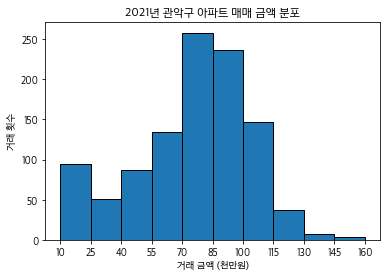

In [18]:
trade_price = df_reduced['거래금액'].values / 1000 # 천만원 단위로 저장

n, bins, patchs = plt.hist(trade_price, bins=10, edgecolor='k')
plt.title('2021년 관악구 아파트 매매 금액 분포')
plt.xticks(bins, np.int32(bins))
plt.xlabel('거래 금액 (천만원)')
plt.ylabel('거래 횟수')
plt.show()

In [19]:
# 제일 비싼 아파트 찾기

idx = df_reduced['거래금액'].idxmax()
print(df_reduced['아파트'][idx])
df_reduced.loc[idx]

# 제일 오래된 아파트 찾기

idx = df_reduced['건축년도'].idxmin()
print(df_reduced['아파트'][idx])
df_reduced.loc[idx]

# 면적당 가격이 제일 비싼 아파트 찾기
temp = (df_reduced['거래금액'] / df_reduced['전용면적']).copy()
idx = temp.idxmax()
print(df_reduced['아파트'][idx])
df_reduced.loc[idx]


롯데스카이
복권
신림현대


index      882
거래금액     59990
건축년도      1993
법정동        신림동
아파트       신림현대
월            9
일           13
전용면적     34.86
층            3
Name: 849, dtype: object

## 전용면적 분포 (Histogram)

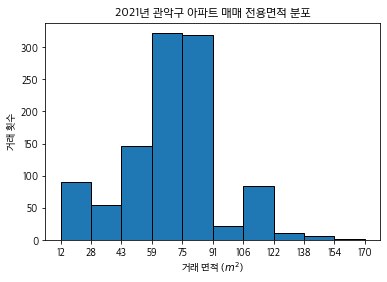

In [20]:
area = df_reduced['전용면적'].values
n, bins, patchs = plt.hist(area, bins=10, edgecolor='k')
plt.title('2021년 관악구 아파트 매매 전용면적 분포')
plt.xticks(bins, np.int32(bins))
plt.xlabel('거래 면적 ($m^2$)')
plt.ylabel('거래 횟수')
plt.show()

## 매매 금액 분포 (Box Plot)

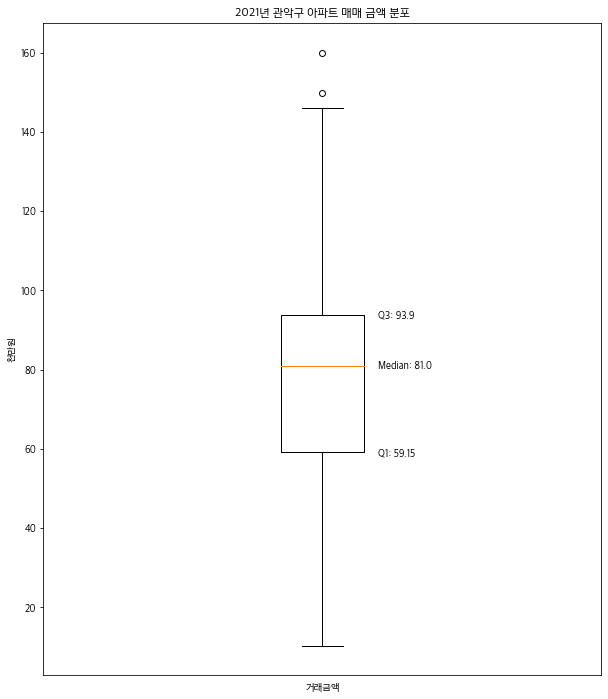

In [21]:
fig = plt.figure(figsize=(10, 12)) # figsize=(가로, 세로)는 inch 단위

med = np.median(trade_price)
plt.boxplot(trade_price.astype(float))
quantiles = np.quantile(trade_price, [0.25, 0.5, 0.75])
quantlabels = ['Q1', 'Median', 'Q3']
for q, label in zip(quantiles, quantlabels):
    plt.text(1.1, q, label+': '+str(q), va='center')
plt.title('2021년 관악구 아파트 매매 금액 분포')
plt.xlabel('거래금액')
plt.ylabel('천만원')
plt.xticks([])
plt.show()


## 지역별 매매량 비율 (Pie Chart)

봉천동    745
신림동    291
남현동     19
Name: 법정동, dtype: Int64
<StringArray>
[' 봉천동', ' 신림동', ' 남현동']
Length: 3, dtype: string


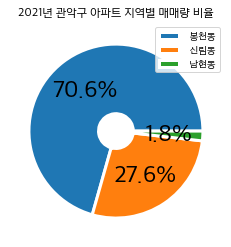

In [22]:
regionsTradeCnt = df_reduced['법정동'].value_counts()
print(regionsTradeCnt)
regionsName = df_reduced['법정동'].unique()
print(regionsName)
# fig = plt.figure(figsize=(10, 10))
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(regionsTradeCnt.values, labels=regionsTradeCnt.index.values, \
        labeldistance=None, wedgeprops=wedgeprops,autopct='%.1f%%', \
        textprops={'fontsize': 24})
plt.title('2021년 관악구 아파트 지역별 매매량 비율')
plt.legend()
plt.show()

## 월별 매매량 (Bar Chart)

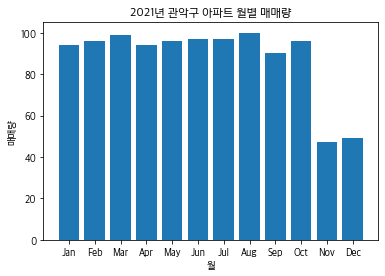

In [23]:
monthlyTradeCnt = df_reduced['월'].value_counts()
monthlyTradeCnt.sort_index(inplace=True)
monthNames = [name[:3] for name in calendar.month_name[1:]] # 타이핑보다 쉽고 간편하다
# fig = plt.figure(figsize=(12, 8))
plt.bar(monthlyTradeCnt.index.values, monthlyTradeCnt.values, tick_label=monthNames)
plt.title('2021년 관악구 아파트 월별 매매량')
plt.xlabel('월')
plt.ylabel('매매량')
plt.show()

## 상관계수(Heatmap)

[Matplotlib 공식 자료](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html?highlight=heatmap)의 함수를 조금 바꾼 개인 함수를 이용하여 거래금액, 건축년도, 전용면적, 층 간의 상관관계를 조사하겠습니다.

상관계수는 -1 이상 +1 이하의 값을 가지며, 두 변수의 선형 관계의 척도를 나타냅니다. 상관계수가 +1이면 두 변수가 완벽히 양의 선형 관계$$y=ax+b, a>0$$를 가지고 -1이면 완벽히 음의 선형 관계($a<0$)를 가진다는 뜻입니다. 그 중간인 경우 적당한 양의 상관관계와 음의 상관관계를 가집니다.

여러 변수들의 상관계수는 행렬 형태로 표기되는데, 이는 Heatmap이라는 차트로 표현하기에 적합합니다. 그런데 matplotlib에는 기본적으로 지원하는 heatmap 함수가 없어서 공식 예제를 조금 변형한 함수를 사용하게 되었습니다. 수업 도중에 배포한 ```image_annotated_heatmap.py``` 파일을 현재 파일과 같은 경로에 놓으면 다음 코드와 같이 ```import``` 구문을 통해 사용할 수 있습니다.

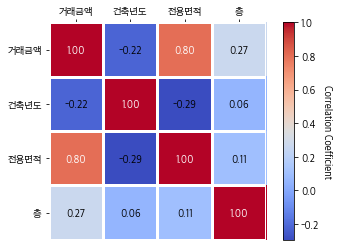

In [24]:
# 건축년도, 거래금액, 전용면적, 층의 상관관계 조사

from image_annotated_heatmap import * # 해당 모듈 안의 모든 속성, 메소드를 가져옴)

df_corr = df_reduced[['거래금액', '건축년도', '전용면적', '층']].corr(method='pearson').copy()
im, cbar = heatmap(df_corr.values, df_corr.index.values, df_corr.columns.values, cmap="coolwarm", cbarlabel="Correlation Coefficient")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
plt.show()

## 건축년도와 전용면적

앞에서 건축년도와 전용면적이 약간의 음의 상관관계를 가지는 것을 알 수 있었습니다. 그 말은 건축년도 값이 클수록 전용면적 값이 작아진다는 뜻, 즉 새 건물일수록 면적이 좁다는 뜻입니다. 흥미로워보여서 x축이 건축년도, y축이 전용면적인 산점도를 그려 보았습니다. 상관관계의 크기가 작아서 별다른 경향성은 없어보이는 느낌입니다.

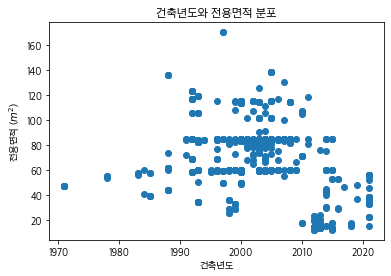

In [25]:
year = df_reduced['건축년도'].values
plt.scatter(year, area)
plt.title('건축년도와 전용면적 분포')
plt.xlabel('건축년도')
plt.ylabel('전용면적 ($m^2$)')
plt.show()

## 거래금액과 전용면적

이번엔 양의 상관계수가 0.8이나 되었던 거래금액과 전용면적의 산점도를 그려 보았습니다. 역시 확실히 경향성이 보이는 것을 알 수 있습니다.

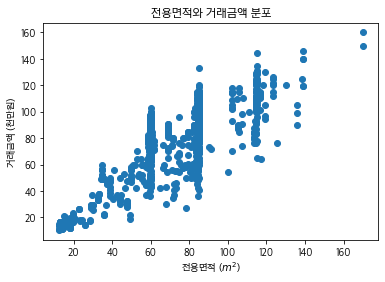

In [26]:
plt.scatter(area, trade_price)
plt.title('전용면적와 거래금액 분포')
plt.xlabel('전용면적 ($m^2$)')
plt.ylabel('거래금액 (천만원)')
plt.show()

## 선형 회귀

선형 회귀(Linear Regression)이란 두 변수 $x$와 $y$가 서로 선형 관계 $y=ax+b$를 가진다고 했을 때 선형함수의 예측값과 실제 데이터의 오차(정의에 따라 조금씩 다름)가 최대한 작아지도록, 즉 직선이 두 변수의 경향성을 최대한 잘 예측하게 하는 방법이다. 쉽게 말해 엑셀에 들어있는 추세선 그리기 기능이다.

파이썬에서 선형 회귀는 주로 scikit-learn같은 머신러닝 패키지를 통해 다루지만, 이번 강의에서는 numpy로 선형 회귀를 해 볼 것이다. ```np.linalg.lstsq()``` 함수는 최소 제곱법을 통해 직선의 두 계수 (a, b)를 계산하는 함수이다.

> 최소 제곱법이란, 선형함수의 예측값($\hat{y}$)과 실제 데이터($y$)의 오차의 제곱의 합이 최소가 되도록 하는 직선의 계수 $a$, $b$를 구하는 방법이다.

선형회귀에서, 두 변수의 상관계수(Correlation Coefficient)와 결정계수(Coefficient of Determination)는 같은 값을 가지며 결정계수는 R-square 값이라고도 한다. 즉 결정계수가 1에 가까울수록 두 변수가 선형관계로 잘 설명된다는 뜻이다.

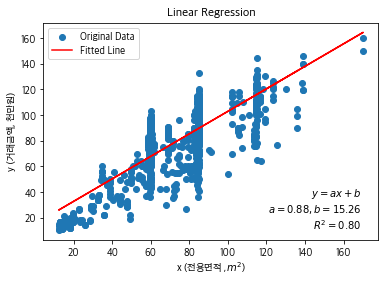

In [27]:
x = area
y = trade_price
R = df_corr.loc['거래금액', '전용면적']
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
# np.linalg.solve(): Ax = b 라는 행렬 방정식의 정확한 해를 구함
# np.linalg.lstsq(): Ax = b 라는 행렬 방정식의 근사해를 구함 (by 최소제곱법)

plt.scatter(x, y, label='Original Data')
plt.plot(x, a*x + b, 'r', label='Fitted Line')
plot_text = f'$y=ax+b$\n$a={a:.2f}, b={b:.2f}$\n$R^2={R:.2f}$'
plt.text(0.95, 0.05, plot_text, transform=plt.gca().transAxes , ha='right')
plt.title('Linear Regression')
plt.xlabel('x (전용면적 ,$m^2$)')
plt.ylabel('y (거래금액, 천만원)')
plt.legend()
plt.show()